# Classification Task for Social Network Analysis

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Our dataset

### Load it 

In [157]:
import pandas as pd

In [158]:
df = pd.read_csv('train 2.csv')
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874855,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Preprocessing and checks

In [159]:
df.info() #we can see that there is no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [160]:
df.duplicated().sum() #check for duplicates

132

In [161]:
df = df.drop_duplicates()#remove the duplicates 

In [162]:
df.describe() #it seems that there are outliers and some skeweness in the data. Let's visualize!

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5368.000000,5.368000e+03,5.368000e+03,5368.000000,5.368000e+03,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,...,5368.000000,5368.000000,5.368000e+03,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000
mean,0.509687,6.531546e+05,1.268433e+04,5964.257452,2.703850e+03,1044.594283,6.010116,1.110900,9.034317,5307.927906,...,12652.984911,5914.551043,2.591819e+03,1008.857731,6.111806,1.106489,9.477078,5306.139158,84.856233,3752.620368
std,0.499953,2.042057e+06,4.891607e+04,17492.766722,2.951678e+04,11084.712393,9.533824,1.916878,18.225719,29259.930714,...,49856.067279,16417.448299,2.538935e+04,9450.741428,9.755998,1.942058,19.317847,27063.933568,106.277355,5557.683473
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.687750e+03,3.217500e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.625805,12.000000,...,322.000000,78.000000,3.277718e+00,0.716251,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.790000e+02,932.000000,4.876542e+01,14.029113,2.291802,0.341936,3.467754,195.000000,...,771.000000,890.000000,4.853027e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2214.125820
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.049859,1.320681,10.600502,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.946233,1.318140,10.600502,1323.000000,109.728261,4345.216686
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874200,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874200,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083330


## Visualize the data 

### Distribution

<AxesSubplot:>

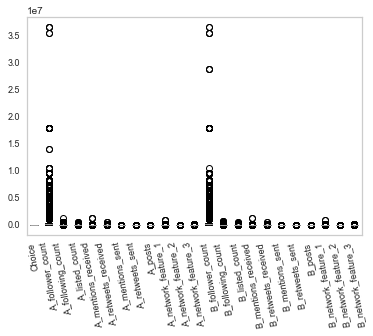

In [163]:
df.boxplot(grid=False, rot=100, fontsize=9) #there are indeed outliers. Potential solution is normalization! 

### Skewness

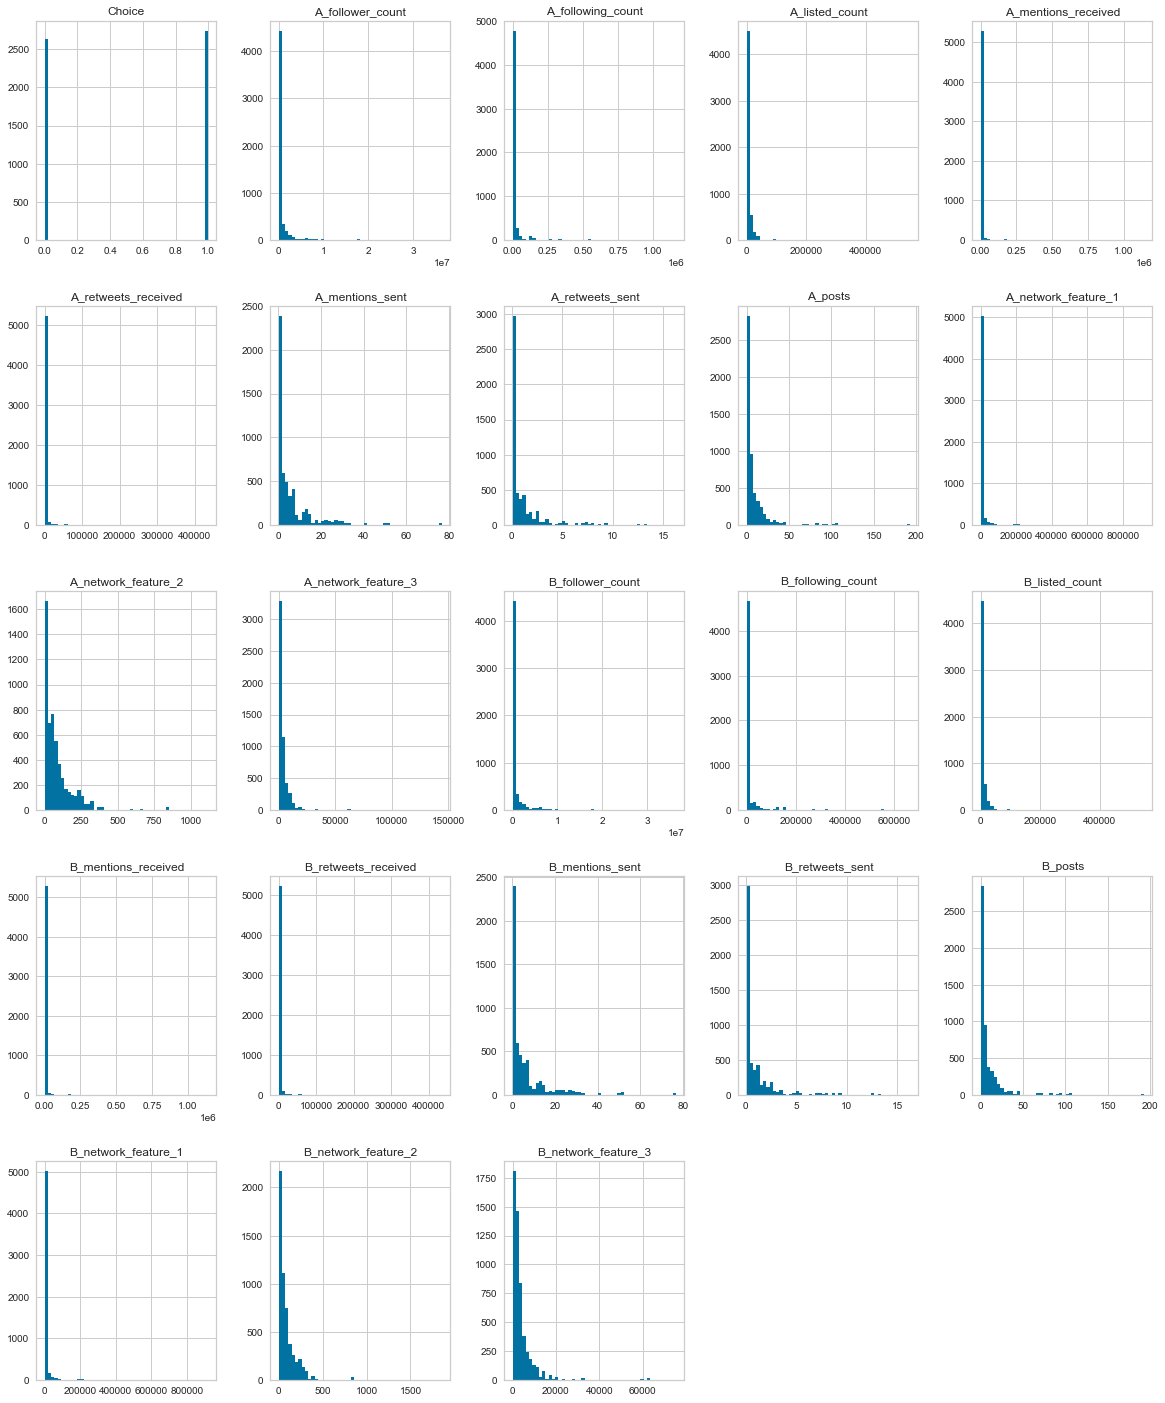

In [164]:
#Visualize the data and assess the distributions : Right skewed --> Solution: logarithm
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,25), histtype = 'stepfilled')
plt.show()

### Correlations

In [165]:
df.corr() #we need to recheck after feature engineering and remove features (one of them) that are highly correlated


,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
Choice,1.000000,0.131380,0.061581,0.131516,0.020498,0.023583,0.122944,0.137273,0.105772,0.064689,...,-0.039918,-0.188790,-0.062660,-0.065099,-0.136732,-0.166904,-0.098263,-0.108128,-0.053903,-0.069566
A_follower_count,0.131380,1.000000,0.115377,0.816715,0.513563,0.523423,0.017474,0.094833,0.042954,0.623108,...,0.035033,0.142375,0.029197,0.030490,-0.011759,-0.010772,-0.012754,0.051684,-0.035348,-0.014451
A_following_count,0.061581,0.115377,1.000000,0.100306,0.058860,0.052484,0.106138,-0.084108,0.132235,0.047678,...,-0.010233,-0.010655,0.001160,-0.001742,0.008568,0.004420,0.000715,-0.002269,0.006556,-0.001957
A_listed_count,0.131516,0.816715,0.100306,1.000000,0.736381,0.749279,0.060945,0.154929,0.052753,0.705882,...,0.049168,0.205345,0.045567,0.045211,-0.003057,0.006273,0.004649,0.068544,-0.035808,-0.011076
A_mentions_received,0.020498,0.513563,0.058860,0.736381,1.000000,0.990101,0.023558,0.050413,0.026157,0.922850,...,0.023797,0.136670,0.010790,0.007980,-0.009116,-0.012789,-0.011582,0.023011,-0.017689,-0.011299
A_retweets_received,0.023583,0.523423,0.052484,0.749279,0.990101,1.000000,0.019398,0.044170,0.032632,0.928574,...,0.023838,0.140439,0.011422,0.008590,-0.007777,-0.013546,-0.010577,0.023799,-0.017779,-0.012959
A_mentions_sent,0.122944,0.017474,0.106138,0.060945,0.023558,0.019398,1.000000,0.583221,0.610217,0.032843,...,0.026899,0.006767,0.006482,0.010497,0.017731,0.005253,0.021312,0.005205,0.017301,0.014186
A_retweets_sent,0.137273,0.094833,-0.084108,0.154929,0.050413,0.044170,0.583221,1.000000,0.381269,0.082310,...,0.017108,0.039454,0.057907,0.059976,0.030210,0.012635,0.039561,0.050512,-0.002151,0.007470
A_posts,0.105772,0.042954,0.132235,0.052753,0.026157,0.032632,0.610217,0.381269,1.000000,0.073404,...,0.018504,-0.004428,0.001895,0.005870,0.029303,0.004399,0.020793,-0.002006,0.013451,0.005721
A_network_feature_1,0.064689,0.623108,0.047678,0.705882,0.922850,0.928574,0.032843,0.082310,0.073404,1.000000,...,0.034926,0.127713,0.012267,0.010749,-0.003477,-0.013602,-0.011156,0.026089,-0.023674,-0.015575


In [166]:
#remove the highly correlated based on a threshold google this !! 

## Feature engineering

In [167]:
df['follower_diff'] = (df['A_follower_count'] - df['B_follower_count'])
df['following_diff'] = (df['A_following_count'] - df['B_following_count'])
df['listed_diff'] = (df['A_listed_count'] - df['B_listed_count'])
df['mentions_rec_diff'] = (df['A_mentions_received'] - df['B_mentions_received'])
df['rt_rec_diff'] = (df['A_retweets_received'] - df['B_retweets_received'])
df['mentions_sent_diff'] = (df['A_mentions_sent'] - df['B_mentions_sent'])
df['rt_sent_diff'] = (df['A_retweets_sent'] - df['B_retweets_sent'])
df['posts_diff'] = (df['A_posts'] - df['B_posts'])
df['feature1_diff'] = (df['A_network_feature_1'] - df['B_network_feature_1'])
df['feature2_diff'] = (df['A_network_feature_2'] - df['B_network_feature_2'])
df['feature3_diff'] = (df['A_network_feature_3'] - df['B_network_feature_3'])
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diff,listed_diff,mentions_rec_diff,rt_rec_diff,mentions_sent_diff,rt_sent_diff,posts_diff,feature1_diff,feature2_diff,feature3_diff
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149289
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


In [168]:
#rename the graph features
df = df.rename({'feature1_diff': 'degree_diff', 'feature2_diff':'betweeness_diff','feature3_diff': 'closeness_diff'}, axis=1) 
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diff,listed_diff,mentions_rec_diff,rt_rec_diff,mentions_sent_diff,rt_sent_diff,posts_diff,degree_diff,betweeness_diff,closeness_diff
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149289
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


In [169]:
import pandas as pd
#Remove the other columns 
df.drop(df.iloc[:, 1:23], inplace = True, axis = 1) 

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Choice              5368 non-null   int64  
 1   follower_diff       5368 non-null   int64  
 2   following_diff      5368 non-null   int64  
 3   listed_diff         5368 non-null   int64  
 4   mentions_rec_diff   5368 non-null   float64
 5   rt_rec_diff         5368 non-null   float64
 6   mentions_sent_diff  5368 non-null   float64
 7   rt_sent_diff        5368 non-null   float64
 8   posts_diff          5368 non-null   float64
 9   degree_diff         5368 non-null   int64  
 10  betweeness_diff     5368 non-null   float64
 11  closeness_diff      5368 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 545.2 KB


In [171]:
#Now let's check the correlations 
df.corr()

,Choice,follower_diff,following_diff,listed_diff,mentions_rec_diff,rt_rec_diff,mentions_sent_diff,rt_sent_diff,posts_diff,degree_diff,betweeness_diff,closeness_diff
Choice,1.000000,0.224926,0.071258,0.252441,0.056705,0.060439,0.185369,0.216590,0.145578,0.122515,0.090823,0.107459
follower_diff,0.224926,1.000000,0.162589,0.781722,0.421551,0.428399,0.027034,0.096549,0.059759,0.554175,-0.125316,-0.032316
following_diff,0.071258,0.162589,1.000000,0.135750,0.045898,0.039952,0.100471,-0.092338,0.134330,0.041077,0.040573,0.096014
listed_diff,0.252441,0.781722,0.135750,1.000000,0.681169,0.694710,0.066460,0.154113,0.064082,0.654962,-0.052299,-0.033346
mentions_rec_diff,0.056705,0.421551,0.045898,0.681169,1.000000,0.988450,0.026310,0.030143,0.034206,0.914955,-0.049600,-0.031882
rt_rec_diff,0.060439,0.428399,0.039952,0.694710,0.988450,1.000000,0.019742,0.025066,0.039724,0.920833,-0.051667,-0.032591
mentions_sent_diff,0.185369,0.027034,0.100471,0.066460,0.026310,0.019742,1.000000,0.568475,0.589821,0.032771,0.058397,0.032564
rt_sent_diff,0.216590,0.096549,-0.092338,0.154113,0.030143,0.025066,0.568475,1.000000,0.376910,0.067839,-0.038554,-0.036051
posts_diff,0.145578,0.059759,0.134330,0.064082,0.034206,0.039724,0.589821,0.376910,1.000000,0.085752,-0.071285,-0.035151
degree_diff,0.122515,0.554175,0.041077,0.654962,0.914955,0.920833,0.032771,0.067839,0.085752,1.000000,-0.099036,-0.062577


In [172]:
#We need to remove one of the two: mentions_rec_diff and rt_rec_diff. Let's remove retweets received 
df = df.drop('rt_rec_diff', axis = 1)

## Modelling Prep

### Check the dependant variable "Choice" distribution

In [173]:
df['Choice'].value_counts() #It is balance no need to do stratification

1    2736
0    2632
Name: Choice, dtype: int64

### Seperate train test

In [174]:
#Seperating dependent and independent variables from data
y = np.asarray(df['Choice'])
X = df.drop(['Choice'],axis=1)

#Standardize the features 
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)

#Use the log
#from sklearn.preprocessing import FunctionTransformer
#log_transformation = FunctionTransformer(np.log1p, validate=True)
#X_logged = log_transformation.fit_transform(df.astype(float))
#X_logged = pd.DataFrame(X_logged, columns = df.columns)

In [175]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=4)

In [176]:
# Random Forest Feature Elimination with coefficients
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
model_rf = rf.fit(X_train,y_train)
model_rf.feature_importances_
model_rf_df = pd.DataFrame(list(zip(X.columns,model_rf.feature_importances_)),columns=['predictor','feature importance'])
model_rf_df 

,predictor,feature importance
0,follower_diff,0.092421
1,following_diff,0.076202
2,listed_diff,0.308744
3,mentions_rec_diff,0.050426
4,rt_rec_diff,0.075573
5,mentions_sent_diff,0.062064
6,rt_sent_diff,0.052306
7,posts_diff,0.061747
8,feature1_diff,0.083002
9,feature2_diff,0.073195


In [177]:
#pip install yellowbrick

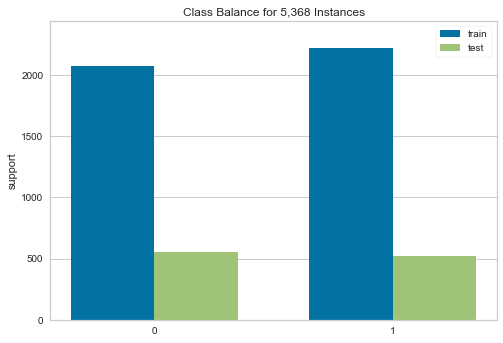

<AxesSubplot:title={'center':'Class Balance for 5,368 Instances'}, ylabel='support'>

In [110]:
#Just check if the data is balanced

from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()

## Models

### Functions

In [178]:
#Classification Score
def clf_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        
        precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
        average_precision = average_precision_score(y_test, clf.predict(X_test))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
        roc_auc = roc_auc_score(y_test, clf.predict(X_test))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        plot_confusion_matrix(clf,  X_test, clf.predict(X_test))
        print("End of validation Result\n")

In [179]:
#classification matrix
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### Models

In [180]:
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

In [181]:
#logistic Regression Model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
lr_corr = metrics.confusion_matrix(y_test, y_pred_lr)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_lr)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_lr)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_lr)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_lr)))

Accuracy_Score: 0.7318435754189944
Precision_Score: 0.6984402079722704
Recall_Score: 0.7794970986460348
F1_Score: 0.7367458866544789


In [182]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=0)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
rfc_corr = metrics.confusion_matrix(y_test, y_pred_rfc)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_rfc)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_rfc)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_rfc)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_rfc)))

Accuracy_Score: 0.750465549348231
Precision_Score: 0.7389635316698656
Recall_Score: 0.7446808510638298
F1_Score: 0.7418111753371869


In [183]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbt = GradientBoostingClassifier(random_state=0)
model_gbt.fit(X_train, y_train)
y_pred_gbt = model_gbt.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_gbt)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_gbt)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_gbt)))

Accuracy_Score: 0.7579143389199255
Precision_Score: 0.7429111531190926
Recall_Score: 0.7601547388781431
F1_Score: 0.7514340344168261


## Best Model Feature Tuning

### Gridsearch

In [185]:
# Gradient Boosting Classifier

# Model Built
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.025, 0.05,0.1,1,0.5],
    "max_depth":[3,4,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[150,200]
    }

clf = GridSearchCV(estimator=gbt, param_grid=parameters, cv=5,verbose = 0)
gbt_result = clf.fit(X_train, y_train)
clf.cv_results_
df_gbt = pd.DataFrame(clf.cv_results_)
df_gbt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.613106,0.043297,0.003457,0.000087,0.01,3,log2,150,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.755530,0.759022,0.767171,0.784633,0.768065,0.766884,0.010072,23
1,0.844245,0.148899,0.004246,0.000043,0.01,3,log2,200,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.754366,0.767171,0.770664,0.784633,0.765734,0.768514,0.009738,11
2,0.645859,0.051836,0.003910,0.000588,0.01,3,sqrt,150,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.755530,0.759022,0.767171,0.784633,0.768065,0.766884,0.010072,23
3,0.872072,0.094386,0.004730,0.000873,0.01,3,sqrt,200,"{'learning_rate': 0.01, 'max_depth': 3, 'max_f...",0.754366,0.767171,0.770664,0.784633,0.765734,0.768514,0.009738,11
4,0.757902,0.022706,0.004011,0.000091,0.01,4,log2,150,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...",0.760186,0.763679,0.769499,0.784633,0.769231,0.769446,0.008363,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.239858,0.019337,0.004837,0.000063,0.50,5,sqrt,200,"{'learning_rate': 0.5, 'max_depth': 5, 'max_fe...",0.720605,0.731083,0.738068,0.736903,0.741259,0.733584,0.007276,79
92,1.740795,0.038239,0.007066,0.000068,0.50,8,log2,150,"{'learning_rate': 0.5, 'max_depth': 8, 'max_fe...",0.721769,0.749709,0.729919,0.754366,0.740093,0.739171,0.012093,67
93,2.186497,0.043168,0.008837,0.000276,0.50,8,log2,200,"{'learning_rate': 0.5, 'max_depth': 8, 'max_fe...",0.735739,0.749709,0.742724,0.754366,0.740093,0.744526,0.006690,65
94,1.757637,0.015463,0.007036,0.000074,0.50,8,sqrt,150,"{'learning_rate': 0.5, 'max_depth': 8, 'max_fe...",0.721769,0.749709,0.729919,0.754366,0.740093,0.739171,0.012093,67


In [186]:
print(f'Best Accuracy: {gbt_result.best_score_} for {gbt_result.best_params_}')

Best Accuracy: 0.7706095611799919 for {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}


## Results

In [190]:
#Creating GradientBoosting model with best parameters
final_model = GradientBoostingClassifier(**gbt_result.best_params_)
final_predictor = final_model.fit(X_train,y_train)
print('Accuracy on train: ',final_predictor.score(X_train,y_train))
print('Accuracy on test:' , final_predictor.score(X_test,y_test))

Accuracy on train:  0.8167210060549605
Accuracy on test: 0.7662942271880819


### Classification Report 

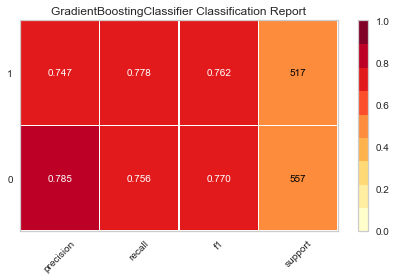

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [191]:
from yellowbrick.classifier import ClassificationReport

classes = ["0", "1"]

visualizer = ClassificationReport(
    final_model, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)   
visualizer.show()

### Confusion Matrix

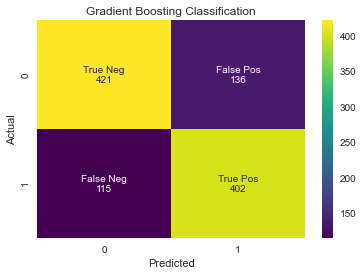

In [192]:
# Confusion Matrix

y_pred_gbt = final_model.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbt_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(gbt_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Gradient Boosting Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

## Feature Importance

In [198]:
X = X.rename({'feature1_diff': 'degree_diff', 'feature2_diff':'betweeness_diff','feature3_diff': 'closeness_diff'}, axis=1) 


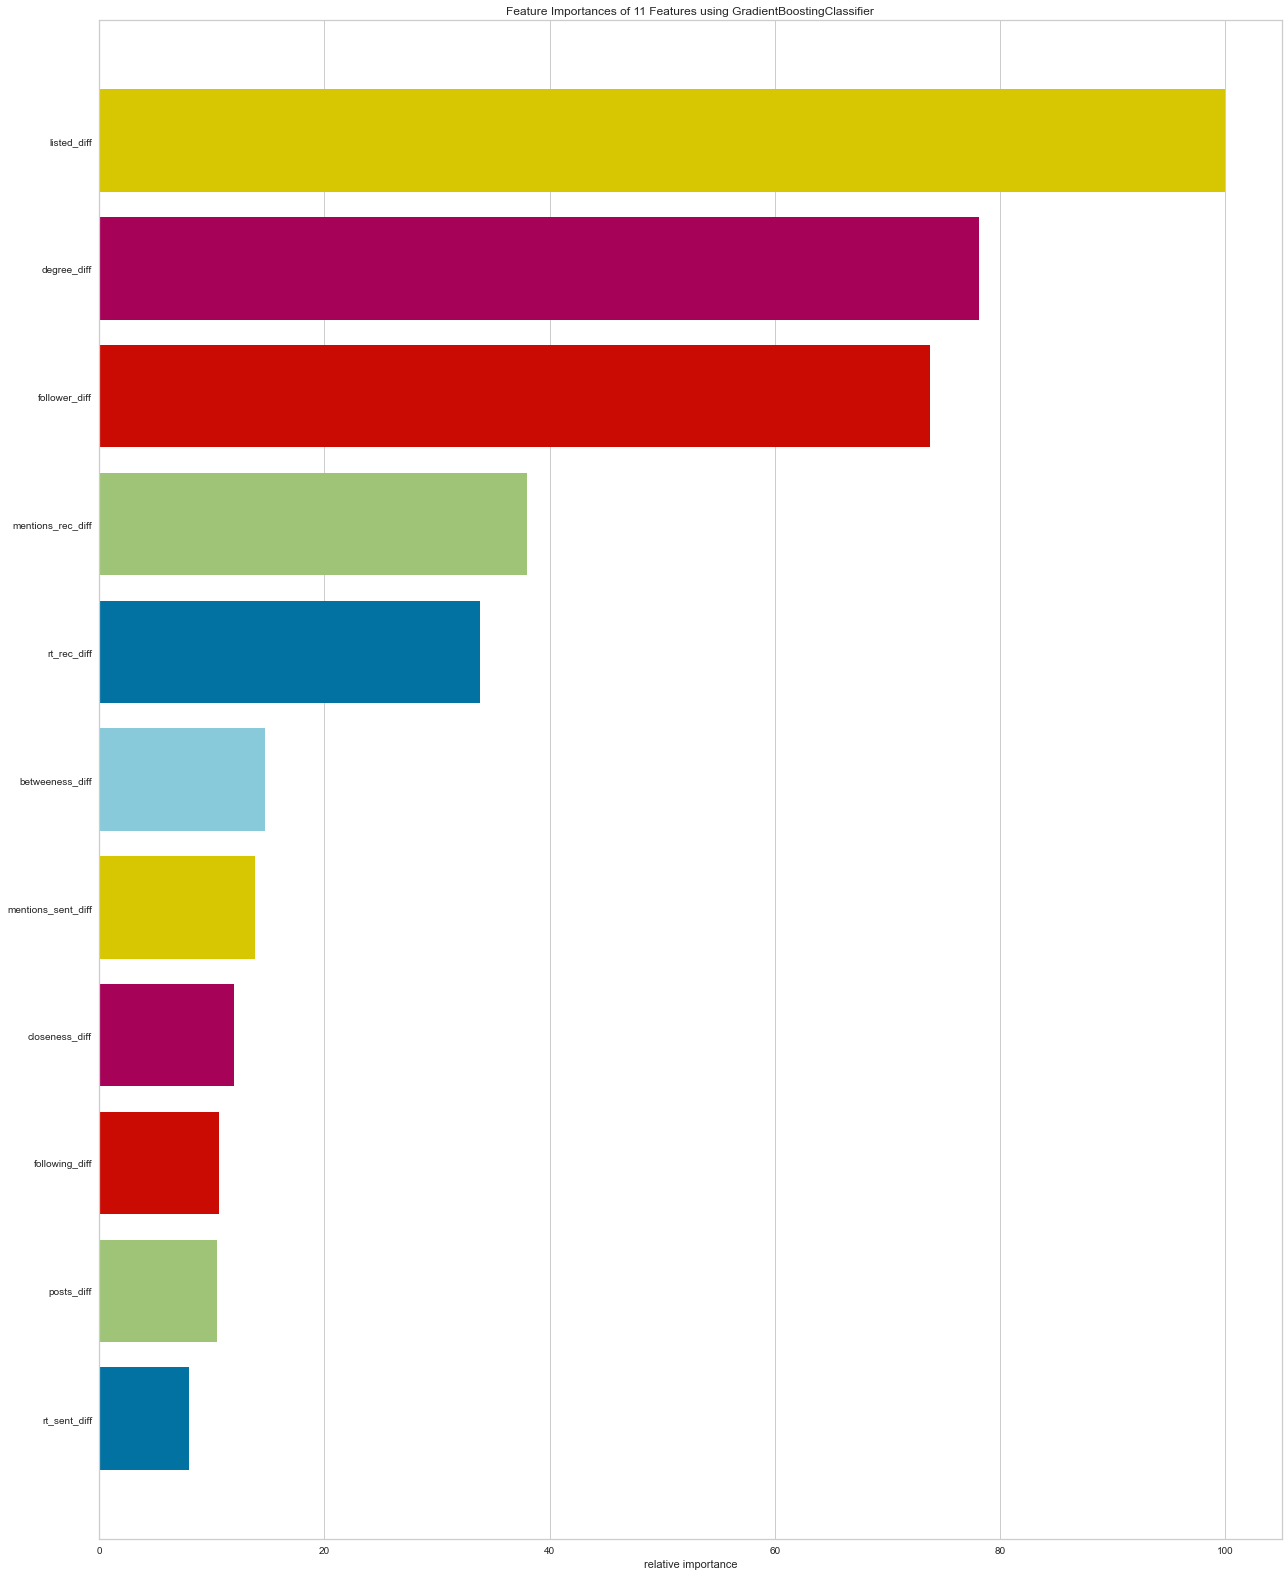

<AxesSubplot:title={'center':'Feature Importances of 11 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [200]:
import numpy as np
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(18, 22))
viz = FeatureImportances(final_model, labels=X.columns)
viz.fit(X_train, y_train)
viz.poof()

The Top 3 most important features in determining whether A is more influential than B  in order of importance are: the difference in listed counts between A and B, the difference in degree centrality and the difference in number of followers. It is not surprising to see that difference in listed count is the most determinant predictor of influence because being added to a Twitter list means that the user values your tweets and finds them useful. It is the easiest way of segmenting “tweetos” whose tweets you don't want to miss. It is not even required to follow them, they can simply be added to a list. Therefore the difference in the listed count makes sense to show influence. Additionally, in social network analysis the degree centrality gives an importance score based on the number of links each node holds. Thus, it gives us the number of direct connections each node has to the other nodes which is a representation of how popular an individual is. Therefore the difference in degree centrality here shows the difference in popularity between A and B. Again, not surprising to see the latter as the second most important predictor and also to see the difference in number of followers as the third most important one. However, it is surprising to see features such as the difference in posts counts not play a big role in determining whether someone is an influencer or not. We might tend to think that people think that a major difference between an influencer and a non influencer would be that the influencers tend to post more on Twitter, but according to our final model it is not among the most important features. 
Our model could be valuable to a business looking for influencers for an advertising campaign. In order to select these influencers since there is no clear definition of who might be an influencer, the business can make an informed decision by looking at the best predictors of influence determined by our model. The business according to our solution would primarily be looking at the listed count and the number of followers. 

